In [18]:
### Importing the required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
from rdkit.Chem import MolStandardize
import joblib

import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors,rdMolDescriptors
#import openpyxl


In [19]:
### Installation of the basic library 
from rdkit import Chem,DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import Crippen
import numpy as np

In [20]:
### Reading the preprocess data from disk 
train_set=pd.read_csv('data/unique_train4_new24.csv')
test_set=pd.read_csv('data/unique_test_new24.csv')
print(train_set.shape)
print(test_set.shape)

(16626, 4)
(1282, 5)


In [21]:
train_smiles_list=train_set[['smiles_canon']]
test_smiles_list=test_set[['smiles_canon']]

In [22]:

### Importing the function of the utility file to generate the descriptors and others evaluation matrics...  
import utilities

In [160]:
#import pandas as pd
### Taking out the descriptors from the disk 
#df_train_38=pd.read_csv('data/df_train_fe.csv')
#df_test_38=pd.read_csv('data/df_test_fe.csv') 
#df_train_fg=pd.read_csv('data/df_train_fg.csv')
#df_test_fg=pd.read_csv('data/df_test_fg.csv') 

In [179]:
#df_train_38

,Unnamed: 0,smiles_canon,Solubility,charge,many_double_bonds,atoms_degree_0,atoms_degree_1,atoms_degree_2,atoms_degree_3,atoms_degree_4,...,zero_bonds,conjugated_bonds,bonds_in_ring,chirality_none,chirality_any,chirality_z,chirality_e,n_atoms,n_bonds,n_rings
0,0,O=C1c2ccccc2C(=O)c2c(Cl)cccc21,-5.540000,0,0,0,10,0,42,0,...,0,18,16,26,0,0,0,24,26,3
1,1,NC(N)=NS(=O)(=O)c1ccc(N)cc1,-1.984970,0,0,0,12,2,30,4,...,0,10,6,24,0,0,0,24,24,1
2,2,CCC1C(N)CN1c1cc2c(cc1F)c(=O)c(C(=O)O)cn2C1CC1,-3.912000,0,0,0,23,2,39,32,...,0,16,18,48,0,0,0,45,48,4
3,3,CCC1(CC)OC(=O)c2cc([N+](=O)[O-])ccc21,-3.656000,1,0,0,16,2,24,20,...,0,12,10,31,0,0,0,30,31,2
4,4,O=C1C=Cc2ccccc2C1=NO,-2.937000,0,0,0,8,4,30,0,...,0,14,11,21,0,0,0,20,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,16621,c1cnoc1,0.383095,0,0,0,3,4,9,0,...,0,5,5,8,0,0,0,8,8,1
16622,16622,c1coc(-c2nc3ccccc3[nH]2)c1,-3.414016,-1,0,0,8,4,36,0,...,0,16,15,24,0,0,0,22,24,3
16623,16623,c1nc[nH]n1,0.897170,0,0,0,3,4,9,0,...,0,5,5,8,0,0,0,8,8,1
16624,16624,c1ncc2[nH]cnc2n1,0.619695,0,0,0,4,6,18,0,...,0,10,10,14,0,0,0,13,14,2


In [23]:
### Generate 4 descriptors ....
df4_train=utilities.generate4(train_set.smiles_canon)
df4_test=utilities.generate4(test_set.smiles_canon)
### Generate 17 descriptors ....
df17_train=utilities.generate17(train_set.smiles_canon)
df17_test=utilities.generate17(test_set.smiles_canon)
### Generate 123 descriptors ....
df123_train=utilities.generate123(train_set.smiles_canon)
df123_test=utilities.generate123(test_set.smiles_canon)
### Generate 38 feature engineered based on the structure of the smiles ....
df38_train=utilities.generate_features38(train_set.smiles_canon)
df38_test=utilities.generate_features38(test_set.smiles_canon)
### Generate 7 funnctional groups
df7_train=utilities.get_functional_groups(train_set.smiles_canon)
df7_test=utilities.get_functional_groups(test_set.smiles_canon)
### Fingerprint 128....
df128_train=utilities.fingerprint(train_set.smiles_canon,2,128)
df128_test=utilities.fingerprint(test_set.smiles_canon,2,128)
### Fingerprint 256....
df256_train=utilities.fingerprint(train_set.smiles_canon,2,256)
df256_test=utilities.fingerprint(test_set.smiles_canon,2,256)
### Fingerprint 512....
df512_train=utilities.fingerprint(train_set.smiles_canon,2,512)
df512_test=utilities.fingerprint(test_set.smiles_canon,2,512)
### Fingerprint 1024....
df1024_train=utilities.fingerprint(train_set.smiles_canon,2,1024)
df1024_test=utilities.fingerprint(test_set.smiles_canon,2,1024)

In [41]:
df128_train=utilities.fingerprint(train_set.smiles_canon,2,128)
df128_test=utilities.fingerprint(test_set.smiles_canon,2,128)

In [24]:
y_train=train_set.copy()['Solubility']
y_test=test_set.copy()['Solubility']

In [25]:
### Importing library to evaluate the best model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgboost
from xgboost import XGBRegressor


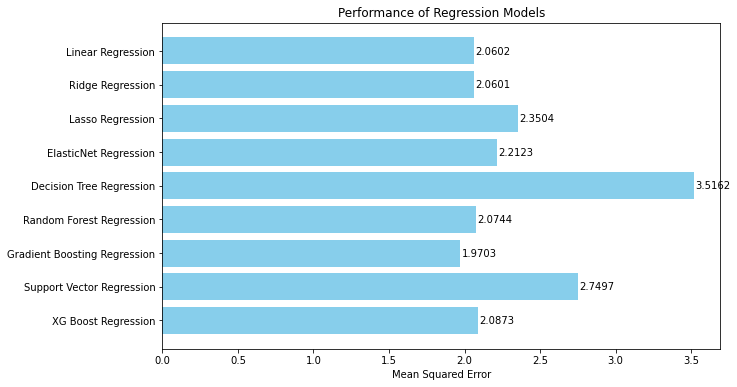

In [26]:
### Function to evaluate the Regresoor model 
def evaluate_model(X, y, model):
    """
    Evaluate a regression model using cross-validation and calculate the mean squared error.
    
    Parameters:
    - X: Feature matrix (DataFrame or array-like)
    - y: Target vector (Series or array-like)
    - model: Regression model object
    
    Returns:
    - Mean squared error (float)
    """
    cv_results = cross_validate(model, X, y, cv=10, scoring='neg_mean_squared_error')
    mse = -np.mean(cv_results['test_score'])
    return mse

# Extract feature matrix X and target vector y from the dataset
X = df4_train  ### descriptors 
y = y_train ### solubility values in LogS 

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
     'XG Boost Regression': XGBRegressor()
}

# Evaluate each model and store the results
results = {}
for model_name, model in models.items():
    mse = evaluate_model(X, y, model)
    results[model_name] = mse

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Squared Error'])
results_df.index.name = 'Model'

# Save results to a CSV file
#results_df.to_csv('regression_model_comparison.csv')


plt.figure(figsize=(10, 6))
bars = plt.barh(results_df.index, results_df['Mean Squared Error'], color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Performance of Regression Models')

# Add annotations for each bar
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', 
             va='center', ha='left', color='black')

plt.gca().invert_yaxis()  # Invert y-axis to show the best model on top
plt.show()

In [128]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [200, 400, 600, 800, 1000, 1200],
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}

# Initialize the model
xgboost_model = xgb.XGBRegressor(nthread=2, scale_pos_weight=1, seed=27)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, 
                           scoring=make_scorer(mean_squared_error, greater_is_better=False),
                           cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train1, y_train)

# Print best parameters and lowest RMSE
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(-grid_search.best_score_))

# Train the model with the best parameters
best_params = grid_search.best_params_
xgboost_model = xgb.XGBRegressor(**best_params)
xgboost_model.fit(X_train1, y_train)

# Evaluate the model
y_pred = xgboost_model.predict(X_test1)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("RMSE on test set: ", rmse)
get_errors(y_test,y_pred,"XGB_4")

Fitting 5 folds for each of 294912 candidates, totalling 1474560 fits


In [27]:
### Running the model for basic 4 descriptirs ....
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                           colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
#xgboost_model=GradientBoostingRegressor(learning_rate= 0.055, max_depth=6,min_samples_split= 3, n_estimators= 122,max_features= 'sqrt',subsample=0.98)

### Fitting the model on train data 
xgboost_model.fit(df4_train,y_train)    
### Predicting on test data 
pred_xgb4 = xgboost_model.predict(df4_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_4=utilities.get_errors1(y_test,pred_xgb4,"XGB_4")

In [28]:
### Addinng the features details...
xgb_4['Descriptors_Detail']='4 features'

In [30]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                           colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(df17_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df17_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_17=utilities.get_errors1(y_test,pred_xgb,"XGB_17")

In [31]:
xgb_17['Descriptors_Detail']='17 features'

In [32]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(df123_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df123_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_125=utilities.get_errors1(y_test,pred_xgb,"XGB_125")

In [33]:
xgb_125['Descriptors_Detail']='125 features'

In [34]:
### 125 and 7 group added and become 132 features 
df132_train=pd.concat([df123_train, df7_train], axis=1)
df132_test=pd.concat([df123_test, df7_test], axis=1)

In [36]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(df132_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df132_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_132=utilities.get_errors1(y_test,pred_xgb,"XGB_132")

In [37]:
xgb_132['Descriptors_Detail']='125 features + 7 f_group'

In [38]:
### 125 + 7 functional group + 38 featured engineered total (170)
df170_train=pd.concat([df132_train, df38_train], axis=1)
df170_test=pd.concat([df132_test, df38_test], axis=1)

In [39]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(df170_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df170_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_170=utilities.get_errors1(y_test,pred_xgb,"XGB_170")

In [40]:
xgb_170['Descriptors_Detail']='125_features + 7_f_group+38 fe_features'

In [43]:
df298_train=pd.concat([df170_train, df128_train], axis=1)
df298_test=pd.concat([df170_test, df128_test], axis=1)

In [109]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(df298_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df298_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_298=utilities.get_errors1(y_test,pred_xgb,"XGB_298")

In [102]:
xgb_298['Descriptors_Detail']='125_features + 7_f_group+38fe_features+128_fp'

In [138]:
### Remove nan and infinity values from the dataset
df_train2 = pd.concat([df298_train, y_train], axis=1)
df_test2 = pd.concat([df298_test, y_test], axis=1)
df_train = df_train2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df_test = df_test2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_train = df_train.iloc[:, :-1]  # All columns except the last one
y_train = df_train.iloc[:, -1] 
X_test = df_test.iloc[:, :-1]  # All columns except the last one
y_test = df_test.iloc[:, -1] 

In [139]:
X_train = df_train.iloc[:, :-1]  # All columns except the last one
y_train = df_train.iloc[:, -1] 
X_test = df_test.iloc[:, :-1]  # All columns except the last one
y_test = df_test.iloc[:, -1] 

In [50]:
rf = RandomForestRegressor(
    n_estimators=1000,          # Number of trees
    max_depth=10,              # Maximum depth of each tree
    min_samples_split=2,       # Minimum samples required to split an internal node
    min_samples_leaf=1,        # Minimum samples required to be at a leaf node
    max_features='auto',       # Number of features to consider when looking for the best split
    random_state=42            # Random state for reproducibility
)
### Fitting the model on train data 
rf.fit(X_train,y_train)    
### Predicting on test data 
pred_rf = rf.predict(X_test)
### Calculating the evaluation matrix MAE , RMSE and R2
rf_298=utilities.get_errors1(y_test,pred_rf,"rf_298")

In [51]:
rf_298['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+128_fp'

In [52]:
rf_298

,Model_Name,MAE,MSE,RMSE,R2,Descriptors_Detail
0,rf_298,0.4962,0.4067,0.6378,0.9025,125_features + 7_f_group+38 fe_features+128_fp


In [53]:
gb = GradientBoostingRegressor(
    n_estimators=1000,          # Number of boosting stages to be run
    learning_rate=0.01,         # Learning rate shrinks the contribution of each tree
    max_depth=8,               # Maximum depth of the individual estimators
    min_samples_split=2,       # Minimum number of samples required to split an internal node
    min_samples_leaf=1,        # Minimum number of samples required to be at a leaf node
    max_features=None,         # Number of features to consider when looking for the best split
    random_state=42            # Random state for reproducibility
)
### Fitting the model on train data 
gb.fit(X_train,y_train)    
### Predicting on test data 
pred_gb = gb.predict(X_test)
### Calculating the evaluation matrix MAE , RMSE and R2
gb_298=utilities.get_errors1(y_test,pred_gb,"gb_298")

In [54]:
gb_298['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+128_fp'

In [55]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)#, validation_split=0.2)
pred_nn = model.predict(X_test)
### Calculating the evaluation matrix MAE , RMSE and R2
nn_298=utilities.get_errors1(y_test,pred_nn,"nn_298")


2024-08-20 20:01:29.274678: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-08-20 20:01:29.281162: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-20 20:01:29.999973: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
520/520 [==============================] - 1s 2ms/step - loss: 2.3881
Epoch 2/100
520/520 [==============================] - 1s 3ms/step - loss: 1.1416
Epoch 3/100
520/520 [==============================] - 1s 2ms/step - loss: 0.8876
Epoch 4/100
520/520 [==============================] - 1s 2ms/step - loss: 0.8377
Epoch 5/100
520/520 [==============================] - 1s 2ms/step - loss: 0.6673
Epoch 6/100
520/520 [==============================] - 1s 2ms/step - loss: 0.5876
Epoch 7/100
520/520 [==============================] - 1s 2ms/step - loss: 0.6062
Epoch 8/100
520/520 [==============================] - 1s 2ms/step - loss: 0.4985
Epoch 9/100
520/520 [==============================] - 1s 2ms/step - loss: 0.4603
Epoch 10/100
520/520 [==============================] - 1s 2ms/step - loss: 0.3880
Epoch 11/100
520/520 [==============================] - 1s 2ms/step - loss: 0.3866
Epoch 12/100
520/520 [==============================] - 1s 2ms/step - loss: 0.3553
Epoch 13/100


In [58]:
nn_298['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+128_fp'

In [61]:
gb_298

,Model_Name,MAE,MSE,RMSE,R2,Descriptors_Detail
0,gb_298,0.4285,0.3217,0.5672,0.9229,125_features + 7_f_group+38 fe_features+128_fp


In [64]:

df426_train=pd.concat([df170_train, df256_train], axis=1)
df426_test=pd.concat([df170_test, df256_test], axis=1)

In [65]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(df426_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df426_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_426=utilities.get_errors1(y_test,pred_xgb,"XGB_426")

In [66]:
xgb_426['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+256_fp'

In [68]:
df682_train=pd.concat([df170_train, df512_train], axis=1)
df682_test=pd.concat([df170_test, df512_test], axis=1)

In [69]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(df682_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df682_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_682=utilities.get_errors1(y_test,pred_xgb,"XGB_682")

In [70]:
xgb_682['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+512_fp'

In [71]:
df1194_train=pd.concat([df170_train, df1024_train], axis=1)
df1194_test=pd.concat([df170_test, df1024_test], axis=1)

In [72]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(df1194_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df1194_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_1194=utilities.get_errors1(y_test,pred_xgb,"XGB_1194")

In [74]:
xgb_1194['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+1024_fp'

In [75]:
from sklearn.feature_selection import SelectFromModel

In [76]:
def select_features_lasso(train_data,test_data):
    """
    Selects descriptors from training data then applies on both training and test data 
    """
    
    lasso = Lasso(alpha=0.01,max_iter=10000,random_state=1).fit(train_data.drop(columns=['Solubility']), train_data['Solubility'])
    model = SelectFromModel(lasso, prefit=True)
    X_new_lasso = model.transform(train_data.drop(columns=['Solubility']))
    # Get back the kept features as a DataFrame with dropped columns as all 0s
    selected_features = pd.DataFrame(model.inverse_transform(X_new_lasso), index=train_data.drop(columns=['Solubility']).index, columns=train_data.drop(columns=['Solubility']).columns)
    # Dropped columns have values of all 0s, keep other columns 
    selected_columns_lasso = selected_features.columns[selected_features.var() != 0]
    
    selected_data_train = train_data[selected_columns_lasso]             
    selected_data_test = test_data[selected_columns_lasso]
    selected_data_test = selected_data_test.apply(pd.to_numeric)
    
    print(selected_data_train.columns)
    print("Total selected descriptors by LASSO:",len(selected_data_train.columns))
      
    return selected_data_train, selected_data_test


In [77]:
X_train13=pd.concat([df123_train, y_train], axis=1)
X_test13=pd.concat([df123_test, y_test], axis=1)

In [78]:
y_train1=y_train.copy()
y_test1=y_test.copy()

In [79]:
X_train14=X_train13.copy()
X_test14=X_test13.copy()

In [80]:
### Removing the NAN and infinitive values from the dataset 
X_train14 = X_train14.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_tetst14 = X_test14.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train1 = y_train1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test1 = y_test1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [81]:
### Selecting the important features with Lasso technique ...
selected_data_train, selected_data_test = select_features_lasso(X_train14,X_test14)


Index(['MinEStateIndex', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'FpDensityMorgan1', 'FpDensityMorgan3',
       'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_MRHI', 'AvgIpc', 'BalabanJ',
       'BertzCT', 'Chi1', 'Chi1v', 'Chi3v', 'Chi4v', 'Kappa3', 'LabuteASA',
       'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13',
       'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2',
       'SMR_VSA3', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9',
       'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2',
       'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA7', 'SlogP_VSA8',
       'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA2', 'EState_VSA4',
       'EState_VSA5', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9',
       'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3',
       'VSA_EState4', 'VSA_EState5', 'VSA_EState6', '

In [82]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)

xgboost_model.fit(selected_data_train,y_train1)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(selected_data_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_76=utilities.get_errors1(y_test1,pred_xgb,"XGB_76")

In [83]:
xgb_76['Descriptors_Detail']='76 features_by_LASSO'

In [84]:
#### Calculating descriptors which used by Sorkun -...
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors

def get_mordred(mol, desc_names=False):
    """
    Generates predefined descriptors for a given RDKit mol object.
    
    Parameters:
    mol (RDKit Mol object): The molecule for which descriptors are to be calculated.
    desc_names (bool): If True, returns only the list of descriptor names.

    Returns:
    list: List of descriptor values if desc_names is False.
    list: List of descriptor names if desc_names is True.
    """
    # Initialize the Mordred calculator
    calc = Calculator()

    # Registering specific descriptors
    calc.register(descriptors.AtomCount.AtomCount("X"))
    calc.register(descriptors.AtomCount.AtomCount("HeavyAtom"))
    calc.register(descriptors.Aromatic.AromaticAtomsCount)
    calc.register(descriptors.HydrogenBond.HBondAcceptor)
    calc.register(descriptors.HydrogenBond.HBondDonor)
    calc.register(descriptors.RotatableBond.RotatableBondsCount)
    calc.register(descriptors.BondCount.BondCount("any", False))
    calc.register(descriptors.Aromatic.AromaticBondsCount)
    calc.register(descriptors.BondCount.BondCount("heavy", False))
    calc.register(descriptors.BondCount.BondCount("single", False))
    calc.register(descriptors.BondCount.BondCount("double", False))
    calc.register(descriptors.BondCount.BondCount("triple", False))
    calc.register(descriptors.McGowanVolume.McGowanVolume)
    calc.register(descriptors.TopoPSA.TopoPSA(True))
    calc.register(descriptors.TopoPSA.TopoPSA(False))
    calc.register(descriptors.MoeType.LabuteASA)
    calc.register(descriptors.Polarizability.APol)
    calc.register(descriptors.Polarizability.BPol)
    calc.register(descriptors.AcidBase.AcidicGroupCount)
    calc.register(descriptors.AcidBase.BasicGroupCount)
    calc.register(descriptors.EccentricConnectivityIndex.EccentricConnectivityIndex)
    calc.register(descriptors.TopologicalCharge.TopologicalCharge("raw", 1))
    calc.register(descriptors.TopologicalCharge.TopologicalCharge("mean", 1))
    calc.register(descriptors.SLogP)
    calc.register(descriptors.BertzCT.BertzCT)
    calc.register(descriptors.BalabanJ.BalabanJ)
    calc.register(descriptors.WienerIndex.WienerIndex(True))
    calc.register(descriptors.ZagrebIndex.ZagrebIndex(1, 1))
    calc.register(descriptors.ABCIndex)
    calc.register(descriptors.RingCount.RingCount(None, False, False, None, None))
    calc.register(descriptors.RingCount.RingCount(None, False, False, None, True))
    calc.register(descriptors.RingCount.RingCount(None, False, False, True, None))
    calc.register(descriptors.RingCount.RingCount(None, False, False, True, True))
    calc.register(descriptors.RingCount.RingCount(None, False, False, False, None))
    calc.register(descriptors.RingCount.RingCount(None, False, True, None, None))
    calc.register(descriptors.EState)

    # If desc_names is True, return the list of descriptor names
    if desc_names:
        return [str(desc) for desc in calc.descriptors]
    else:
        # Compute descriptors for the given molecule
        result = calc(mol)
        return result._values

def calculate_element_counts(mol, elements):
    """
    Calculate the count of specified elements in the molecule.

    Parameters:
    mol (RDKit Mol object): The molecule.
    elements (list): List of element symbols to count.

    Returns:
    dict: Dictionary with element counts.
    """
    element_counts = {el: 0 for el in elements}
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
        if symbol in element_counts:
            element_counts[symbol] += 1
    return element_counts

def generate_descriptors_from_smiles_list(smiles_list):
    """
    Generate molecular descriptors from a list of SMILES strings.
    
    Parameters:
    smiles_list (list): List of SMILES strings.

    Returns:
    pd.DataFrame: DataFrame of descriptor values for all SMILES.
    """
    all_descriptors = []
    elements = ['C', 'H', 'Br', 'N', 'O', 'I', 'Cl', 'S', 'F', 'P', 'As', 'Si', 'Se', 'Sn', 'Hg', 'Ge']
    
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError(f"Invalid SMILES string: {smiles}")
        
        # Get the descriptor names and values
        descriptor_names = get_mordred(mol, desc_names=True)
        descriptor_values = get_mordred(mol, desc_names=False)
        
        # Calculate element counts
        element_counts = calculate_element_counts(mol, elements)
        
        # Combine descriptors and element counts
        combined_descriptors = descriptor_values + list(element_counts.values())
        
        all_descriptors.append(combined_descriptors)
    
    # Create the DataFrame
    columns = descriptor_names + elements
    df = pd.DataFrame(all_descriptors, columns=columns)
    return df

In [85]:
smiles_list_train=train_set['smiles_canon'].tolist()
smiles_list_test=test_set['smiles_canon'].tolist()
descriptor_df_train = generate_descriptors_from_smiles_list(smiles_list_train)
descriptor_df_test = generate_descriptors_from_smiles_list(smiles_list_test)
# List of columns to select
columns_to_select = ['nX', 'nHeavyAtom', 'nAromAtom', 'nHBAcc', 'nHBDon', 'nRot', 'nBonds', 'nAromBond', 'nBondsO', 'nBondsS', 'nBondsD', 'nBondsT', 'VMcGowan', 'TopoPSA(NO)', 'TopoPSA', 'LabuteASA', 'apol', 'bpol', 'nAcid', 'nBase', 'ECIndex', 'GGI1', 'JGI1', 'SLogP', 'SMR', 'BertzCT', 'BalabanJ', 'WPol', 'Zagreb1', 'ABC', 'ABCGG', 'nRing', 'nHRing', 'naRing', 'naHRing', 'nARing', 'nFRing', 'NsCH3', 'NdCH2', 'NssCH2', 'NtCH', 'NdsCH', 'NaaCH', 'NsssCH', 'NddC', 'NtsC', 'NdssC', 'NaasC', 'NaaaC', 'NssssC', 'NsNH2', 'NssNH', 'NaaNH', 'NtN', 'NdsN', 'NaaN', 'NsssN', 'NaasN', 'NsOH', 'NdO', 'NssO', 'NaaO', 'NsF', 'NdsssP', 'NdS', 'NssS', 'NaaS', 'NdssS', 'NddssS', 'NsCl', 'NsBr', 'NsI', 'SsCH3', 'SdCH2', 'SssCH2', 'StCH', 'SdsCH', 'SaaCH', 'SsssCH', 'SddC', 'StsC', 'SdssC', 'SaasC', 'SaaaC', 'SssssC', 'SsNH2', 'SssNH', 'SaaNH', 'StN', 'SdsN', 'SaaN', 'SsssN', 'SaasN', 'SsOH', 'SdO', 'SssO', 'SaaO', 'SsF', 'SdsssP', 'SdS', 'SssS', 'SaaS', 'SdssS', 'SddssS', 'SsCl', 'SsBr', 'SsI', 'C', 'H', 'Br', 'N', 'O', 'I', 'Cl', 'S', 'F', 'P', 'As', 'Si', 'Se', 'Sn', 'Hg', 'Ge']

# Create a new DataFrame with selected columns
df_train = descriptor_df_train[columns_to_select]
df_test = descriptor_df_test[columns_to_select]


In [86]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
## Fitting the model on train data 
xgboost_model.fit(df_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df_test)
### Calculating the evaluation matrix MAE , RMSE and R2
sorkun_123=utilities.get_errors1(y_test,pred_xgb,"Sorkun_123")

In [88]:
sorkun_123['Descriptors_Detail']='123 features used in the sorkuns works'

In [99]:
### MPNN result from mpnn.ipynb file 
import pandas as pd

# Define the data
data = {
    "Model_Name": ["Graph based model"],
    "MAE": [0.7135],
    "MSE": [0.8322],
    "RMSE": [0.9135],
    "R2": [0.8023],
    "Descriptors_Detail": ["Message Passing Neural Network (MPNN)"]
}

# Create the DataFrame
mpnn_2l = pd.DataFrame(data)

# Display the DataFrame
mpnn_2l


,Model_Name,MAE,MSE,RMSE,R2,Descriptors_Detail
0,Graph based model,0.7135,0.8322,0.9135,0.8023,Message Passing Neural Network (MPNN)


In [103]:
combined_df=pd.concat([xgb_4,xgb_17,xgb_125,sorkun_123,xgb_132,xgb_170,xgb_298,rf_298,gb_298,nn_298,mpnn_2l,xgb_426,xgb_682,xgb_1194,xgb_76],axis=0)

In [104]:
combined_df.index = pd.RangeIndex(start=1, stop=len(combined_df) + 1, step=1)
combined_df


,Model_Name,MAE,MSE,RMSE,R2,Descriptors_Detail
1,XGB_4,0.5608,0.5166,0.7187,0.8761,4 features
2,XGB_17,0.4708,0.3729,0.6107,0.9106,17 features
3,XGB_125,0.4348,0.3264,0.5713,0.9217,125 features
4,Sorkun_123,0.4564,0.3514,0.5928,0.9157,123 features used in the sorkuns works
5,XGB_132,0.4305,0.3219,0.5674,0.9228,125 features + 7 f_group
6,XGB_170,0.4299,0.3208,0.5664,0.9231,125_features + 7_f_group+38 fe_features
7,XGB_298,0.4289,0.3202,0.5658,0.9232,125_features + 7_f_group+38fe_features+128_fp
8,rf_298,0.4962,0.4067,0.6378,0.9025,125_features + 7_f_group+38 fe_features+128_fp
9,gb_298,0.4285,0.3217,0.5672,0.9229,125_features + 7_f_group+38 fe_features+128_fp
10,nn_298,0.5437,0.5347,0.7312,0.8718,125_features + 7_f_group+38 fe_features+128_fp


In [105]:
## saving this result dataframe to file 
combined_df.to_csv('data/model_results.csv')

In [106]:
### Now we are going to evaluate our best model over the self  experimented 
# compounds solubility with lirerature solubility 

In [107]:
data=[['COC(=O)c1ccc(cc1)O',2.99,2.42,3.64,5.39],['COc1cc(C(=O)O)cc(OC)c1OC',2.58,3.1,2.07,1.68],['CCOC(=O)c1ccc(O)c(O)c1',2.50,2.12,3.55,2.88],
['OC(=O)c1cc(O)c(c(c1)O)O', 11.90,7.2,4.90,12.61],['O=C1OC(=O)c2c1cccc2',6.00, 12,5.01,2.57 ]

]

df_test_new = pd.DataFrame(data, columns=['SMILES', 'Sol_Literature','Sol_Experiment','VCC_Pred','Sorkun_Pred'])

In [108]:
df_test_new

,SMILES,Sol_Literature,Sol_Experiment,VCC_Pred,Sorkun_Pred
0,COC(=O)c1ccc(cc1)O,2.99,2.42,3.64,5.39
1,COc1cc(C(=O)O)cc(OC)c1OC,2.58,3.10,2.07,1.68
2,CCOC(=O)c1ccc(O)c(O)c1,2.50,2.12,3.55,2.88
3,OC(=O)c1cc(O)c(c(c1)O)O,11.90,7.20,4.90,12.61
4,O=C1OC(=O)c2c1cccc2,6.00,12.00,5.01,2.57


In [119]:
def calc_mol_weight(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.MolWt(mol)
    return None

# Apply the function to the SMILES column
df_test_new['MW'] = df_test_new['SMILES'].apply(calc_mol_weight)



In [113]:
### Generate 125 feature engineered based on the structure of the smiles ....
df125=utilities.generate123(df_test_new.SMILES)
### Generate 38 feature engineered based on the structure of the smiles ....

df38=utilities.generate_features38(df_test_new.SMILES)
### Generate 7 funnctional groups

df7=utilities.get_functional_groups(df_test_new.SMILES)
### Fingerprint 128....

df128=utilities.fingerprint(df_test_new.SMILES,2,128)


In [117]:
### Combining all the features  
combined_df = pd.concat([df125, df7, df38, df128], axis=1)


In [124]:
import xgboost as xgb

xgboost_model.save_model('data/xgboost_model.json')
loaded_model = xgb.XGBRegressor()  # or XGBRegressor for regression tasks
loaded_model.load_model('data/xgboost_model.json')
pred_xgb = loaded_model.predict(combined_df)

df_test_new['LogS']=pred_xgb


In [125]:
df_test_new

,SMILES,Sol_Literature,Sol_Experiment,VCC_Pred,Sorkun_Pred,LogS,MW
0,COC(=O)c1ccc(cc1)O,2.99,2.42,3.64,5.39,-1.527297,152.149
1,COc1cc(C(=O)O)cc(OC)c1OC,2.58,3.10,2.07,1.68,-1.879724,212.201
2,CCOC(=O)c1ccc(O)c(O)c1,2.50,2.12,3.55,2.88,-1.976664,182.175
3,OC(=O)c1cc(O)c(c(c1)O)O,11.90,7.20,4.90,12.61,-1.146336,170.120
4,O=C1OC(=O)c2c1cccc2,6.00,12.00,5.01,2.57,-1.698650,148.117


In [126]:
df_test_new['Sol_g_l']=(10**df_test_new.LogS)*df_test_new.MW

In [128]:
df_test_new['LogS'] = df_test_new['LogS'].round(2)
df_test_new['MW'] = df_test_new['MW'].round(2)
df_test_new['Sol_g_l'] = df_test_new['Sol_g_l'].round(2)

In [129]:
df_test_new

,SMILES,Sol_Literature,Sol_Experiment,VCC_Pred,Sorkun_Pred,LogS,MW,Sol_g_l
0,COC(=O)c1ccc(cc1)O,2.99,2.42,3.64,5.39,-1.53,152.15,4.52
1,COc1cc(C(=O)O)cc(OC)c1OC,2.58,3.10,2.07,1.68,-1.88,212.20,2.80
2,CCOC(=O)c1ccc(O)c(O)c1,2.50,2.12,3.55,2.88,-1.98,182.18,1.92
3,OC(=O)c1cc(O)c(c(c1)O)O,11.90,7.20,4.90,12.61,-1.15,170.12,12.15
4,O=C1OC(=O)c2c1cccc2,6.00,12.00,5.01,2.57,-1.70,148.12,2.96


In [130]:
## saving this result dataframe to file 
df_test_new.to_csv('data/compare_results.csv')

In [ ]:
### 3 Evalaution of the model with train and test data 

In [142]:
### Remove nan and infinity values from the dataset
df_train2 = pd.concat([df298_train, y_train], axis=1)
df_test2 = pd.concat([df298_test, y_test], axis=1)
df_train = df_train2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df_test = df_test2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_train = df_train.iloc[:, :-1]  # All columns except the last one
y_train = df_train.iloc[:, -1] 
X_test = df_test.iloc[:, :-1]  # All columns except the last one
y_test = df_test.iloc[:, -1] 

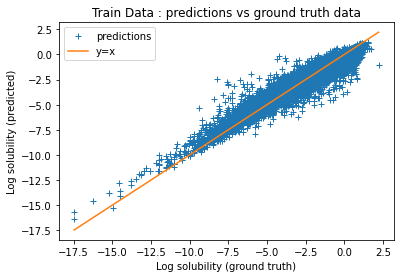

In [143]:
preds = loaded_model.predict(X_train)
x_y_line = np.linspace(min(y_train), max(y_train), 500)
plt.plot(y_train, preds, '+', label='predictions')
plt.plot(x_y_line, x_y_line, label='y=x')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Train Data : predictions vs ground truth data")
plt.legend()

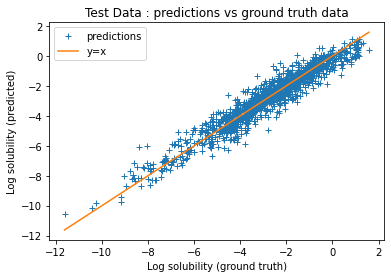

In [144]:
preds = xgboost_model.predict(X_test)
x_y_line = np.linspace(min(y_test), max(y_test), 500)
plt.plot(y_test, preds, '+', label='predictions')
plt.plot(x_y_line, x_y_line, label='y=x')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Test Data : predictions vs ground truth data")
plt.legend()

In [ ]:
### End here ...